In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sb

pd.set_option('display.max_columns', None)

In [2]:
df_data = pd.read_excel(open('../input/DataChallenge_GBDentalClaims.xlsx', 'rb'),
              sheet_name='dataset')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 233 entries, ee_id to province
dtypes: datetime64[ns](1), float64(129), int64(95), object(8)
memory usage: 14.2+ MB


In [4]:
df_data.head()

,ee_id,policy number,member_id,language,gender,pol_renewal_dt,days_exposure_dental,num_claims,total_num_serv_lines,sum_charge_amt,sum_paid_amt,sum_adj_amt,sum_paid_amt_cldld,sum_paid_amt_after_cob,sum_lab_chrg_amt,num_claims_dep,total_num_serv_lines_dep,sum_charge_amt_dep,sum_paid_amt_dep,sum_adj_amt_dep,sum_paid_amt_cldld_dep,sum_paid_amt_after_cob_dep,sum_dent_chrg_amt_dep,sum_lab_chrg_amt_dep,num_claims_exam,num_claims_scaling,num_claims_crowns,num_claims_restorations,num_claims_endodontic,num_claims_extractions,num_claims_polish,num_claims_bridgework,num_claims_root_planing,num_claims_orthodontic,num_claims_dentures,num_claims_anesthesia,num_claims_recall_exam,num_claims_xray,num_claims_bruxism_appliance,num_claims_denturist_services,amt_paid_after_cob_exam,amt_paid_after_cob_scaling,amt_paid_after_cob_crowns,amt_paid_after_cob_restorations,amt_paid_after_cob_endodontic,amt_paid_after_cob_extractions,amt_paid_after_cob_polish,amt_paid_after_cob_bridgework,amt_paid_after_cob_root_planing,amt_paid_after_cob_orthodontic,amt_paid_after_cob_dentures,amt_paid_after_cob_anesthesia,amt_paid_after_cob_recall_exam,amt_paid_after_cob_xray,amt_paid_after_cob_bruxism_appliance,amt_paid_after_cob_denturist_services,ftr_employee_age_as_of_renewal,ftr_employee_spouse_age_as_of_renewal,ftr_employee_son_age_as_of_renewal,ftr_employee_daughter_age_as_of_renewal,ftr_employee_household_size,ftr_employee_number_dependents,ftr_employee_number_children_dependent,ftr_employee_number_other_dependent,ftr_employee_spouse_dependent_flag,ftr_employee_children_dependent_flag,ftr_employee_number_students_household,ftr_employee_number_handicap_household,ftr_employee_student_presence_flag,ftr_employee_handicap_presence_flag,ftr_employee_number_male_household,ftr_employee_number_female_household,ftr_employee_male_presence_flag,ftr_employee_female_presence_flag,ftr_employee_number_deaths_recorded_household,ftr_employee_amt_sal,ftr_employee_days_since_last_salary_change,ftr_employee_days_since_employment,cde_marital_status_eeeb,ftr_employee_retire_flag,ftr_policy_num_employee,ftr_policy_avg_employee_age_as_of_renewal,ftr_policy_q25_employee_age_as_of_renewal,ftr_policy_q75_employee_age_as_of_renewal,ftr_policy_pct_female,ftr_policy_pct_member_w_spouse,ftr_policy_pct_member_w_children,ftr_policy_avg_stu_in_household,num_pol_eert_ret_ftr,ftr_policy_num_retire,ftr_policy_pct_retire,ftr_policy_median_salary,ftr_policy_median_employee_tenure_days,prior1yr_num_claims,prior1yr_total_num_serv_lines,prior1yr_sum_charge_amt,prior1yr_sum_paid_amt_after_cob,prior1yr_num_claims_dep,prior1yr_total_num_serv_lines_dep,prior1yr_sum_charge_amt_dep,prior1yr_sum_paid_amt_after_cob_dep,prior1yr_num_claims_exam,prior1yr_num_claims_scaling,prior1yr_num_claims_crowns,prior1yr_num_claims_restorations,prior1yr_num_claims_endodontic,prior1yr_num_claims_extractions,prior1yr_num_claims_polish,prior1yr_num_claims_bridgework,prior1yr_num_claims_root_planing,prior1yr_num_claims_orthodontic,prior1yr_num_claims_dentures,prior1yr_num_claims_anesthesia,prior1yr_num_claims_recall_exam,prior1yr_num_claims_xray,prior1yr_num_claims_bruxism_appliance,prior1yr_num_claims_denturist_services,prior1yr_amt_paid_after_cob_exam,prior1yr_amt_paid_after_cob_scaling,prior1yr_amt_paid_after_cob_crowns,prior1yr_amt_paid_after_cob_restorations,prior1yr_amt_paid_after_cob_endodontic,prior1yr_amt_paid_after_cob_extractions,prior1yr_amt_paid_after_cob_polish,prior1yr_amt_paid_after_cob_bridgework,prior1yr_amt_paid_after_cob_root_planing,prior1yr_amt_paid_after_cob_orthodontic,prior1yr_amt_paid_after_cob_dentures,prior1yr_amt_paid_after_cob_anesthesia,prior1yr_amt_paid_after_cob_recall_exam,prior1yr_amt_paid_after_cob_xray,prior1yr_amt_paid_after_cob_bruxism_appliance,prior1yr_amt_paid_after_cob_denturist_services,prior2yr_num_claims,prior2yr_total_num_serv_lines,prior2yr_sum_charge_amt,prior2yr_sum_paid_amt_after_cob,prior2yr_num_claims_dep,prior2yr_total_num_serv_lines_dep,prior2yr_sum_charge_amt_dep,prior2yr_sum_

In [5]:
df_data.describe()

,policy number,days_exposure_dental,num_claims,total_num_serv_lines,sum_charge_amt,sum_paid_amt,sum_adj_amt,sum_paid_amt_cldld,sum_paid_amt_after_cob,sum_lab_chrg_amt,num_claims_dep,total_num_serv_lines_dep,sum_charge_amt_dep,sum_paid_amt_dep,sum_adj_amt_dep,sum_paid_amt_cldld_dep,sum_paid_amt_after_cob_dep,sum_dent_chrg_amt_dep,sum_lab_chrg_amt_dep,num_claims_exam,num_claims_scaling,num_claims_crowns,num_claims_restorations,num_claims_endodontic,num_claims_extractions,num_claims_polish,num_claims_bridgework,num_claims_root_planing,num_claims_orthodontic,num_claims_dentures,num_claims_anesthesia,num_claims_recall_exam,num_claims_xray,num_claims_bruxism_appliance,num_claims_denturist_services,amt_paid_after_cob_exam,amt_paid_after_cob_scaling,amt_paid_after_cob_crowns,amt_paid_after_cob_restorations,amt_paid_after_cob_endodontic,amt_paid_after_cob_extractions,amt_paid_after_cob_polish,amt_paid_after_cob_bridgework,amt_paid_after_cob_root_planing,amt_paid_after_cob_orthodontic,amt_paid_after_cob_dentures,amt_paid_after_cob_anesthesia,amt_paid_after_cob_recall_exam,amt_paid_after_cob_xray,amt_paid_after_cob_bruxism_appliance,amt_paid_after_cob_denturist_services,ftr_employee_age_as_of_renewal,ftr_employee_spouse_age_as_of_renewal,ftr_employee_son_age_as_of_renewal,ftr_employee_daughter_age_as_of_renewal,ftr_employee_household_size,ftr_employee_number_dependents,ftr_employee_number_children_dependent,ftr_employee_number_other_dependent,ftr_employee_spouse_dependent_flag,ftr_employee_children_dependent_flag,ftr_employee_number_students_household,ftr_employee_number_handicap_household,ftr_employee_student_presence_flag,ftr_employee_handicap_presence_flag,ftr_employee_number_male_household,ftr_employee_number_female_household,ftr_employee_male_presence_flag,ftr_employee_female_presence_flag,ftr_employee_number_deaths_recorded_household,ftr_employee_amt_sal,ftr_employee_days_since_last_salary_change,ftr_employee_days_since_employment,ftr_employee_retire_flag,ftr_policy_num_employee,ftr_policy_avg_employee_age_as_of_renewal,ftr_policy_q25_employee_age_as_of_renewal,ftr_policy_q75_employee_age_as_of_renewal,ftr_policy_pct_female,ftr_policy_pct_member_w_spouse,ftr_policy_pct_member_w_children,ftr_policy_avg_stu_in_household,num_pol_eert_ret_ftr,ftr_policy_num_retire,ftr_policy_pct_retire,ftr_policy_median_salary,ftr_policy_median_employee_tenure_days,prior1yr_num_claims,prior1yr_total_num_serv_lines,prior1yr_sum_charge_amt,prior1yr_sum_paid_amt_after_cob,prior1yr_num_claims_dep,prior1yr_total_num_serv_lines_dep,prior1yr_sum_charge_amt_dep,prior1yr_sum_paid_amt_after_cob_dep,prior1yr_num_claims_exam,prior1yr_num_claims_scaling,prior1yr_num_claims_crowns,prior1yr_num_claims_restorations,prior1yr_num_claims_endodontic,prior1yr_num_claims_extractions,prior1yr_num_claims_polish,prior1yr_num_claims_bridgework,prior1yr_num_claims_root_planing,prior1yr_num_claims_orthodontic,prior1yr_num_claims_dentures,prior1yr_num_claims_anesthesia,prior1yr_num_claims_recall_exam,prior1yr_num_claims_xray,prior1yr_num_claims_bruxism_appliance,prior1yr_num_claims_denturist_services,prior1yr_amt_paid_after_cob_exam,prior1yr_amt_paid_after_cob_scaling,prior1yr_amt_paid_after_cob_crowns,prior1yr_amt_paid_after_cob_restorations,prior1yr_amt_paid_after_cob_endodontic,prior1yr_amt_paid_after_cob_extractions,prior1yr_amt_paid_after_cob_polish,prior1yr_amt_paid_after_cob_bridgework,prior1yr_amt_paid_after_cob_root_planing,prior1yr_amt_paid_after_cob_orthodontic,prior1yr_amt_paid_after_cob_dentures,prior1yr_amt_paid_after_cob_anesthesia,prior1yr_amt_paid_after_cob_recall_exam,prior1yr_amt_paid_after_cob_xray,prior1yr_amt_paid_after_cob_bruxism_appliance,prior1yr_amt_paid_after_cob_denturist_services,prior2yr_num_claims,prior2yr_total_num_serv_lines,prior2yr_sum_charge_amt,prior2yr_sum_paid_amt_after_cob,prior2yr_num_claims_dep,prior2yr_total_num_serv_lines_dep,prior2yr_sum_charge_amt_dep,prior2yr_sum_paid_amt_after_cob_dep,prior2yr_num_claims_exam,prior2yr_num_claims_sca

### We have a very wide database and quite a few columns have missing values in them. 

### Lets see how many columns have missing values.

In [6]:
# columns with nan

nan_columns = {}

for col in df_data.columns:
    nan_count = df_data[col].isna().sum()
    if nan_count> 0:
        nan_columns[col] = nan_count
        
print(f'Number of columns with missing values: {len(nan_columns)}')

Number of columns with missing values: 64


### 64 columns have missing values. That is quit a few.

### Let's now also have a look at correlation matrix to see what that looks like.

<AxesSubplot:>

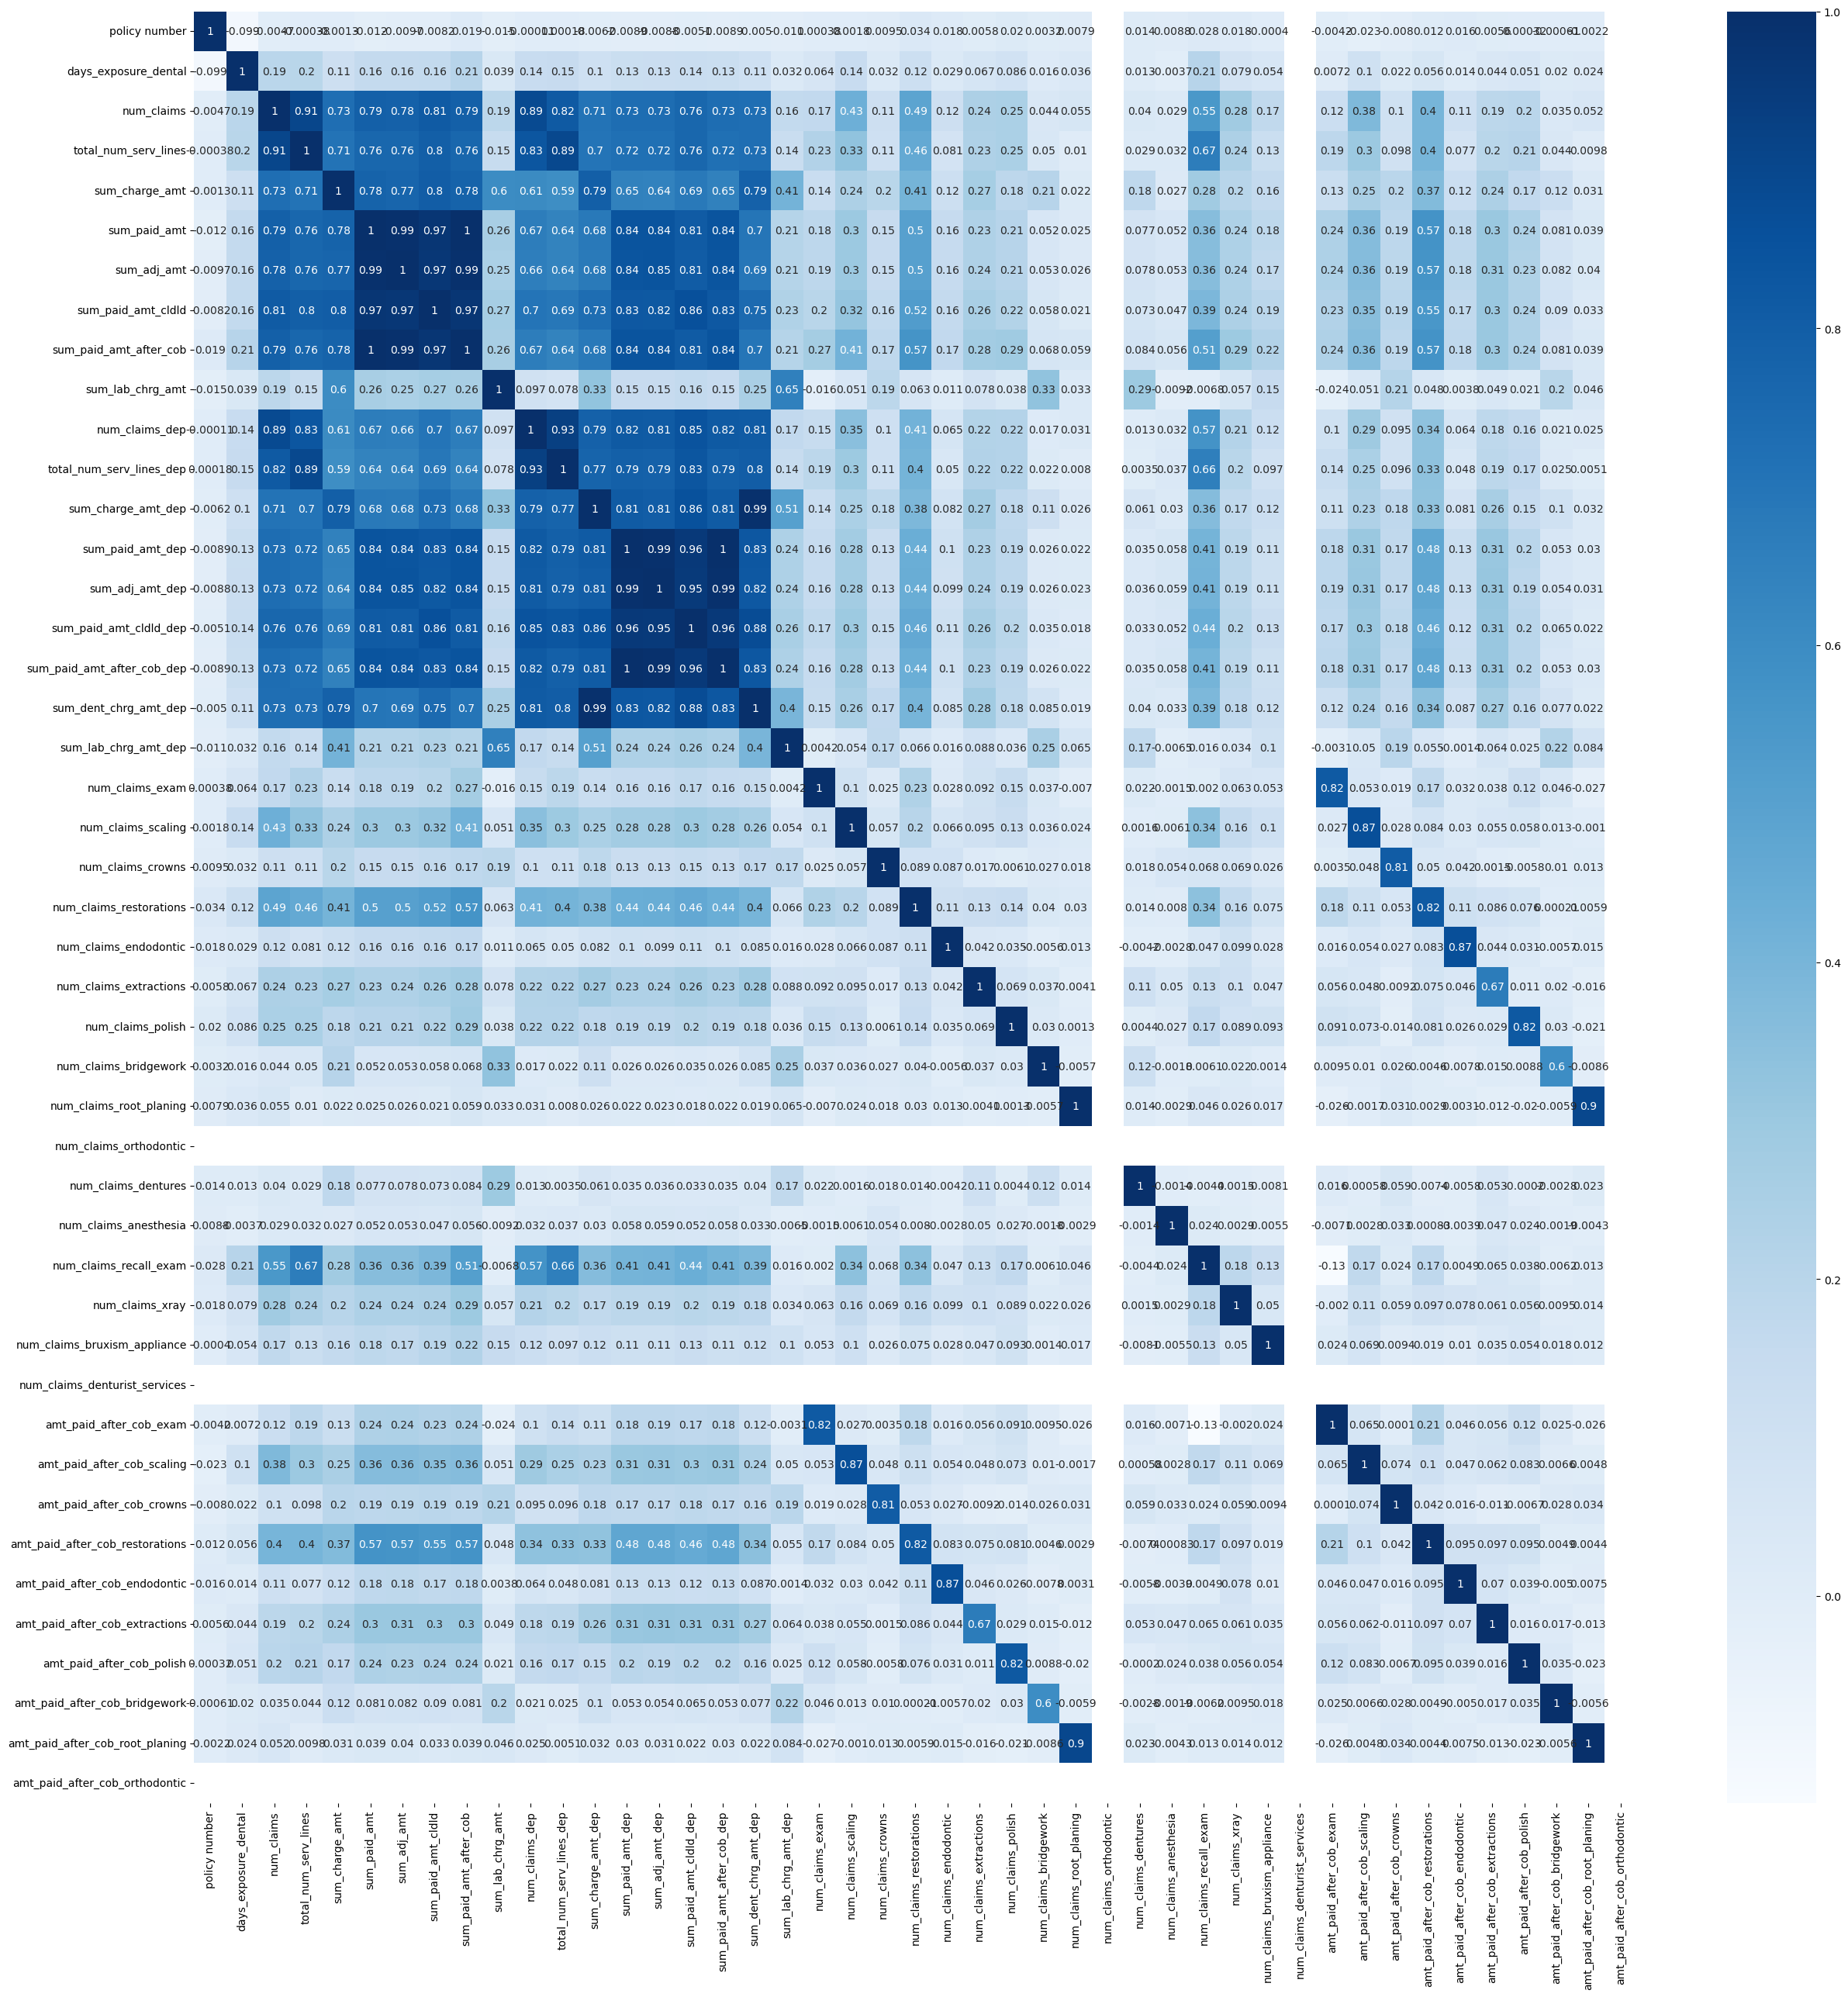

In [7]:
plt.subplots(figsize=(30,30))

corr = df_data[df_data.columns[:50]].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Based on the correlation matrix, it seems that there are some column within the dataset that does not have have any valuable information in them as they have only one value in them. We should remove these columns from our dataset when building a ML model. Also, there is a high degree of colinearity between a couple of columns.

In [8]:
no_info_columns = []
# columns without any info, variance is 0

for col in df_data.columns:
    if df_data[col].dtype == int or df_data[col].dtype == float:
        var = np.var(df_data[col])
        if var == 0:
            no_info_columns.append( col )
            
print(f'Number of columns without any info: {len(no_info_columns)}')

Number of columns without any info: 13


### Lets have a look at the target column.

((array([-3.75508987, -3.52680538, -3.40132748, ...,  3.40132748,
          3.52680538,  3.75508987]),
  array([   0.  ,    0.  ,    0.  , ..., 9361.52, 9451.  , 9619.  ])),
 (858.6622874138176, 694.8194512500002, 0.8342738408531342))

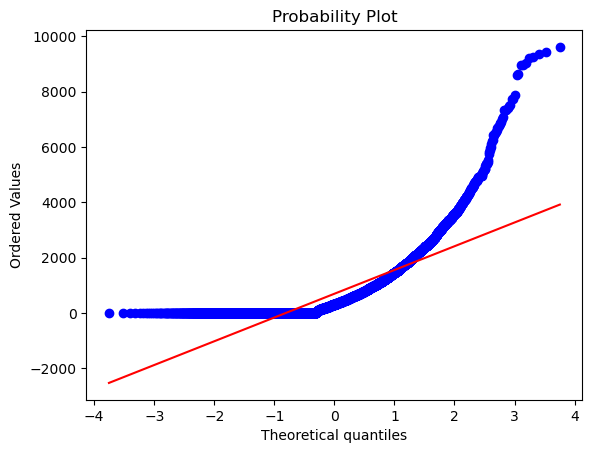

In [10]:
target = 'sum_paid_amt_after_cob'

import scipy.stats as stats

stats.probplot( df_data[target].values, dist="norm", plot=plt)

### Based on Q-Q plot, it seems that the target column is quite skewed.

### We can also have a look at the distribution plot to verify our observation.

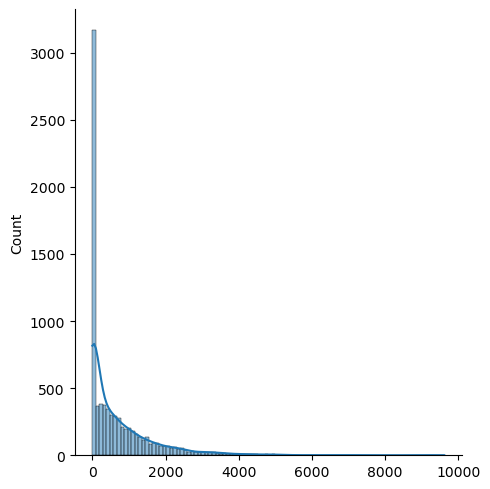

In [14]:
sb.displot(df_data[target].values, kde=True, bins=100)

### The target column has a lot 0s.

In [16]:
df_data[target].value_counts()

0.00       3018
750.00       29
1500.00      23
1000.00      21
2000.00      10
           ... 
1994.71       1
863.66        1
813.10        1
198.10        1
1036.10       1
Name: sum_paid_amt_after_cob, Length: 4238, dtype: int64

In [21]:
3018 / 8000.

0.37725

### Atleast  38% of the people recieved no claim amount for the Group Benefit Member.

### I think we are now ready to start building a ML model.

### To get started, lets create a train and test dataset. This will ensure that we don't mix up the two datasets by mistake.

In [22]:
df = pd.read_excel(open('../input/DataChallenge_GBDentalClaims.xlsx', 'rb'),
              sheet_name='dataset')

df = df.sample(frac=1, random_state = 42)

train_size = int( 0.8 * len(df) )

df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

df_train.to_csv('../input/train.csv', index = False)
df_test.to_csv('../input/test.csv', index = False)

Because we are dealing with a wide dataset, I decided to go with a Lasso Regression (also call L1) model. Lasso regression results in a sparse model. Lasso model is also known to work well when dealing with a data showing a high degree multicolinearity, as this dataset does.

In [29]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

def run(X_train, X_test, y_train, y_test, fill_method = 'median'):
    
    # these columns are just for identifying a member and policy
    X_train.drop(['ee_id', 'policy number', 'member_id'], 
                 axis = 1, inplace = True)
    
    X_test.drop(['ee_id', 'policy number', 'member_id'], 
                 axis = 1, inplace = True)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    no_info_columns = []
    # columns without any info, variance is 0
    # we remove these colums from the dataset.

    for col in X_train.columns:
        if X_train[col].dtype == int or X_train[col].dtype == float:
            var = np.var(X_train[col])
            if var == 0:
                no_info_columns.append( col )

    X_train.drop(columns=no_info_columns, inplace = True)
    X_test.drop(columns=no_info_columns, inplace = True)

    value_columns = list(X_train.select_dtypes(include = "int64").columns) \
        + list(X_train.select_dtypes(include = "float64").columns)

    object_columns = list(X_train.select_dtypes(include = "object").columns)

    object_columns = list(X_train.select_dtypes(include = "object").columns)

    one_hot_encoded_obj = {}

    for feat in object_columns:
        X_train[feat] = X_train[feat].fillna('other')
        X_test[feat] = X_test[feat].fillna('other')
        enc = OneHotEncoder(handle_unknown='ignore')

        enc.fit(X_train[[feat]])

        codes = enc.transform(X_train[[feat]]).toarray()
        feature_names = enc.get_feature_names([feat])
        
        X_train = pd.concat([X_train, pd.DataFrame(codes, columns=feature_names).astype(int)], axis=1)
        X_train.drop(columns=[feat], inplace = True)
        
        codes_test = enc.transform(X_test[[feat]]).toarray()
        X_test = pd.concat([X_test, pd.DataFrame(codes_test, columns=feature_names).astype(int)], axis=1)
        X_test.drop(columns=[feat], inplace = True)
        
        one_hot_encoded_obj[feat] = enc

    scaler_obj = {}

    for feat in value_columns:
        if feat in X_train.columns:
            scaler = preprocessing.StandardScaler()
            scaler.fit(X_train[[feat]])
            X_train[[feat]] = scaler.transform(X_train[[feat]])
            X_test[[feat]] = scaler.transform(X_test[[feat]])
            scaler_obj[feat] = scaler

    # options for fill method
    if fill_method == 'median':
        fill = X_train.median()
        X_train = X_train.fillna(fill)
        X_test = X_test.fillna(fill)

    elif fill_method == 'zero':
        fill = 0
        X_train = X_train.fillna(fill)
        X_test = X_test.fillna(fill)

    elif fill_method == 'mean':
        fill = X_train.mean()
        X_train = X_train.fillna(fill)
        X_test = X_test.fillna(fill)

    else:
        return 'Not a valid method for fill'

    scaler_target = preprocessing.StandardScaler()

    scaler_target.fit(y_train)
    y_train = scaler_target.transform(y_train)

    y_test = scaler_target.transform(y_test)

    # reg = linear_model.LinearRegression(fit_intercept = True)

    best_model = None
    best_mse = float('inf')

    for alpha in [0.1, 0.01, 0.001]:

        reg = linear_model.Lasso(alpha=alpha)

        reg.fit(X_train, y_train)

        mse = mean_squared_error(y_test, reg.predict(X_test))

        print(f'alpha: {alpha}, MSE: {mse}')

        if mse < best_mse:
            best_model = reg
            best_mse = mse

    return best_model, one_hot_encoded_obj, scaler_obj, no_info_columns, fill, scaler_target, object_columns, value_columns

df = pd.read_csv('../input/train.csv')

df['pol_renewal_dt'] = pd.to_datetime(df['pol_renewal_dt'], 
                                           infer_datetime_format=True)

df['pol_renewal_dt'] = df['pol_renewal_dt'].view(int) / 10**9


X, y = df.drop(['sum_paid_amt_after_cob'], axis=1), \
        df[['sum_paid_amt_after_cob']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print('Use median fill')
ans = run(X_train, X_test, y_train, y_test, 'median')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print('Use mean fill')
ans = run(X_train, X_test, y_train, y_test, 'mean')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print('Use 0 fill')
ans = run(X_train, X_test, y_train, y_test, 'zero')


Use median fill
alpha: 0.1, MSE: 0.11007160099776077
alpha: 0.01, MSE: 0.05009470532793068
alpha: 0.001, MSE: 0.04177618841381941
Use mean fill
alpha: 0.1, MSE: 0.18430140878616436
alpha: 0.01, MSE: 0.06673547037034647
alpha: 0.001, MSE: 0.05011323159547214
Use 0 fill
alpha: 0.1, MSE: 0.18430140878616444
alpha: 0.01, MSE: 0.06673547037034647
alpha: 0.001, MSE: 0.05011323159547214


### Based on the results above, median fill is the best option for filling in missing values and alpha=0.001.

alpha: 0.1, MSE: 0.11007160099776077
alpha: 0.01, MSE: 0.05009470532793068
alpha: 0.001, MSE: 0.04177618841381941


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mse on test dataset: 0.03810561147684672


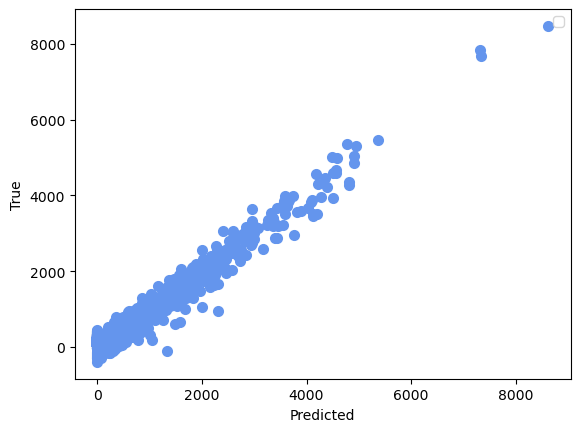

In [26]:
def predict(X_test, model, one_hot_encoded_obj, scaler_obj, fill, no_info_columns, object_columns, value_columns):
    X_test.drop(columns=no_info_columns, inplace = True)

    for feat in object_columns:
        X_test[feat] = X_test[feat].fillna('other')

        enc = one_hot_encoded_obj[feat]
        
        codes_test = enc.transform(X_test[[feat]]).toarray()
        feature_names = enc.get_feature_names([feat])
        X_test = pd.concat([X_test, pd.DataFrame(codes_test, columns=feature_names).astype(int)], axis=1)
        X_test.drop(columns=[feat], inplace = True)

    for feat in value_columns:
        if feat in X_test.columns:
            scaler = scaler_obj[feat]
            X_test[[feat]] = scaler.transform(X_test[[feat]])

    X_test = X_test.fillna(fill)

    y_pred = model.predict(X_test)

    return y_pred

df = pd.read_csv('../input/train.csv')

df['pol_renewal_dt'] = pd.to_datetime(df['pol_renewal_dt'], 
                                           infer_datetime_format=True)

df['pol_renewal_dt'] = df['pol_renewal_dt'].view(int) / 10**9


X, y = df.drop(['sum_paid_amt_after_cob'], axis=1), \
        df[['sum_paid_amt_after_cob']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

best_model, one_hot_encoded_obj, scaler_obj, no_info_columns, fill, scaler_target, object_columns, value_columns = run(X_train, X_test, y_train, y_test, 'median')

df_test = pd.read_csv('../input/test.csv')

df_test['pol_renewal_dt'] = pd.to_datetime(df_test['pol_renewal_dt'], 
                                           infer_datetime_format=True)

df_test['pol_renewal_dt'] = df_test['pol_renewal_dt'].view(int) / 10**9

X_test, y_test = df_test.drop(['sum_paid_amt_after_cob'], axis=1), \
        df_test[['sum_paid_amt_after_cob']]

X_test.drop(['ee_id', 'policy number', 'member_id'], 
             axis = 1, inplace = True)

y_test = scaler_target.transform(y_test)
y_pred = predict(X_test, best_model, one_hot_encoded_obj, scaler_obj, fill, no_info_columns, object_columns, value_columns)

mse = mean_squared_error(y_test, y_pred)

print(f'Mse on test dataset: {mse}')

plt.figure()
# plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(scaler_target.inverse_transform( y_test ).reshape(-1), 
            scaler_target.inverse_transform( y_pred.reshape(-1, 1) ).reshape(-1), 
            color="cornflowerblue", linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("True")

plt.legend()
plt.show()

### The results look pretty good on the test dataset.

We can explore the model further by looking at the coefficient weights. Model weights in Lasso regression are a good proxy to feature importance.

<AxesSubplot:ylabel='feature_name'>

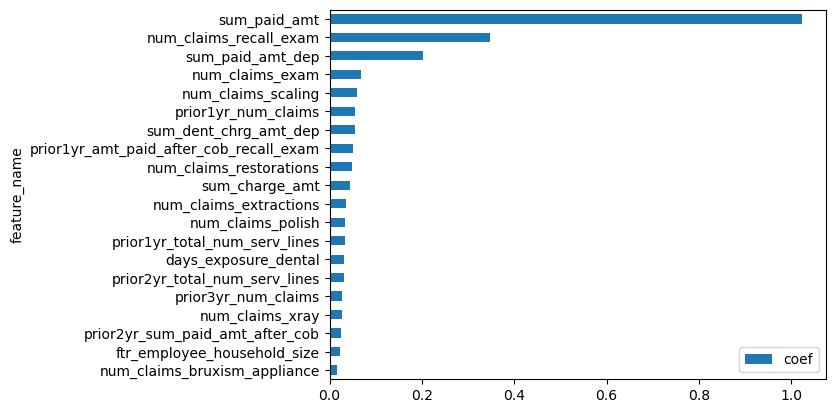

In [27]:
lst = [] 

for coef, feature in zip(best_model.coef_, best_model.feature_names_in_):
    lst.append( [feature, coef] )

# creating df object with columns specified    
df_coef = pd.DataFrame(lst, columns =['feature_name', 'coef']) 

df_coef.sort_values(by = 'coef', ascending=False)[:20][::-1].plot.barh(x='feature_name', y='coef')

### sum_paid_amount is the most important feature when predicting sum_paid_amt_after_cob. This makes sense because I think sum paid amt after cob (Coordination of Benefits) would be highly correlated with the sum paid amount. We can also see that the number of claims related columns are also quite important, this makes sense as your payout would be more the more claims you make.

Some of the other things I tried that didn't lead to great results:
<li> PCA to reduce the dimensionality of the data, fitted a ML model on the PCA data.
<li> Decision Tree Regression, the results weren;t that great.
<li> Polynomial Regression to see if adding interaction effect between features improves the model. It didn't.